### Transformation of Features

Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ----Global Minima
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom

Deep Learning Techniques(Standardization, Scaling)
1.ANN--->GLobal Minima, Gradient
2.CNN
3.RNN

0-255 pixels

##### Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [10]:
import pandas as pd
import seaborn as sns
tit = sns.load_dataset("titanic")
#df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
#df.head()
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df= tit[['pclass','age','fare','survived']]

In [13]:
df.head()

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [15]:
df.isnull().sum()

pclass        0
age         177
fare          0
survived      0
dtype: int64

In [19]:
df['age'].fillna(df.age.median(),inplace=True)

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\875218042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df.age.median(),inplace=True)


In [21]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

In [39]:
X=df.iloc[:,:3]
y = df.iloc[:,3:]

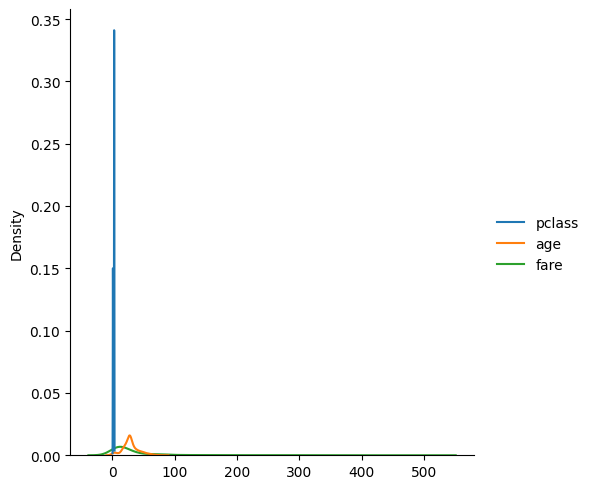

In [59]:
sns.displot(X,kind= 'kde')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
X_train

,pclass,age,fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [43]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

In [44]:
x_train_scale = std.fit_transform(X_train)

In [45]:
x_train_scale

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

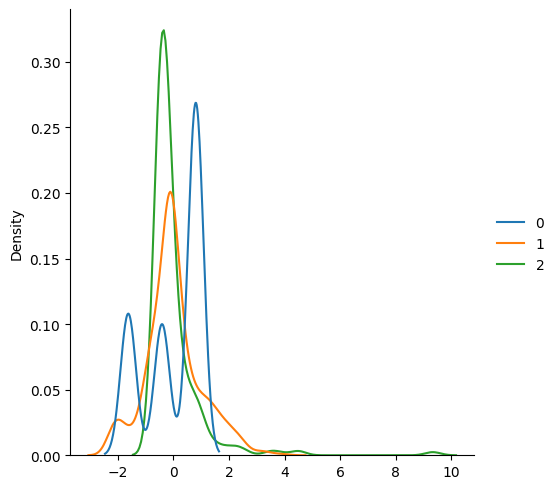

In [60]:
sns.displot(x_train_scale,kind= 'kde')

In [46]:
x_test_scale = std.transform(X_test)

In [47]:
x_test_scale

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [48]:
from sklearn.linear_model import LogisticRegression
logRE = LogisticRegression()

In [49]:
logRE.fit(X_train,y_train)

C:\Users\tumat\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
y_pred = logRE.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.7186440677966102

Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


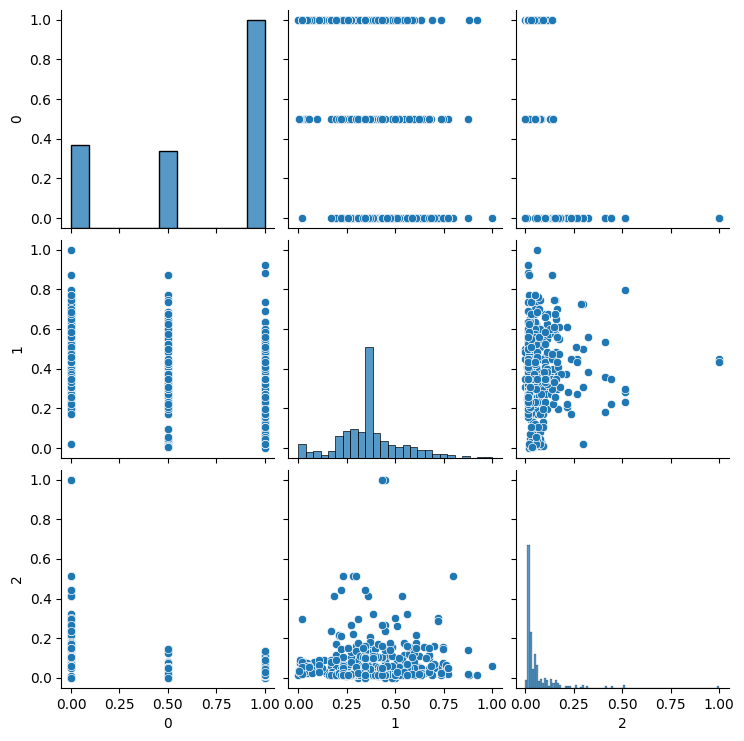

In [64]:
sns.pairplot(df_minmax)

##### Robust Scaler
Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR`

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()

In [69]:
df_robust_scaler=pd.DataFrame(rs.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [71]:
rs.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

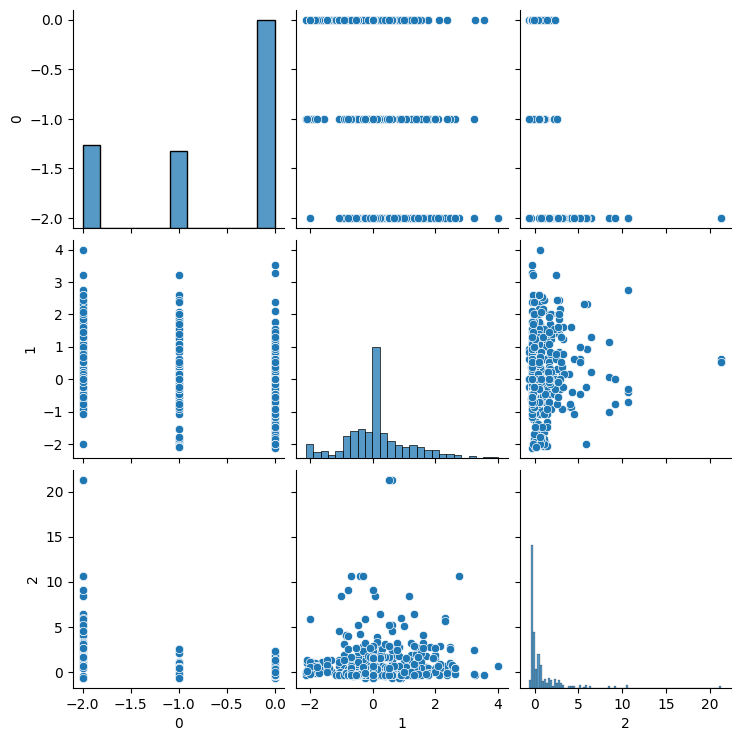

In [72]:
import seaborn as sns
sns.pairplot(df_robust_scaler)

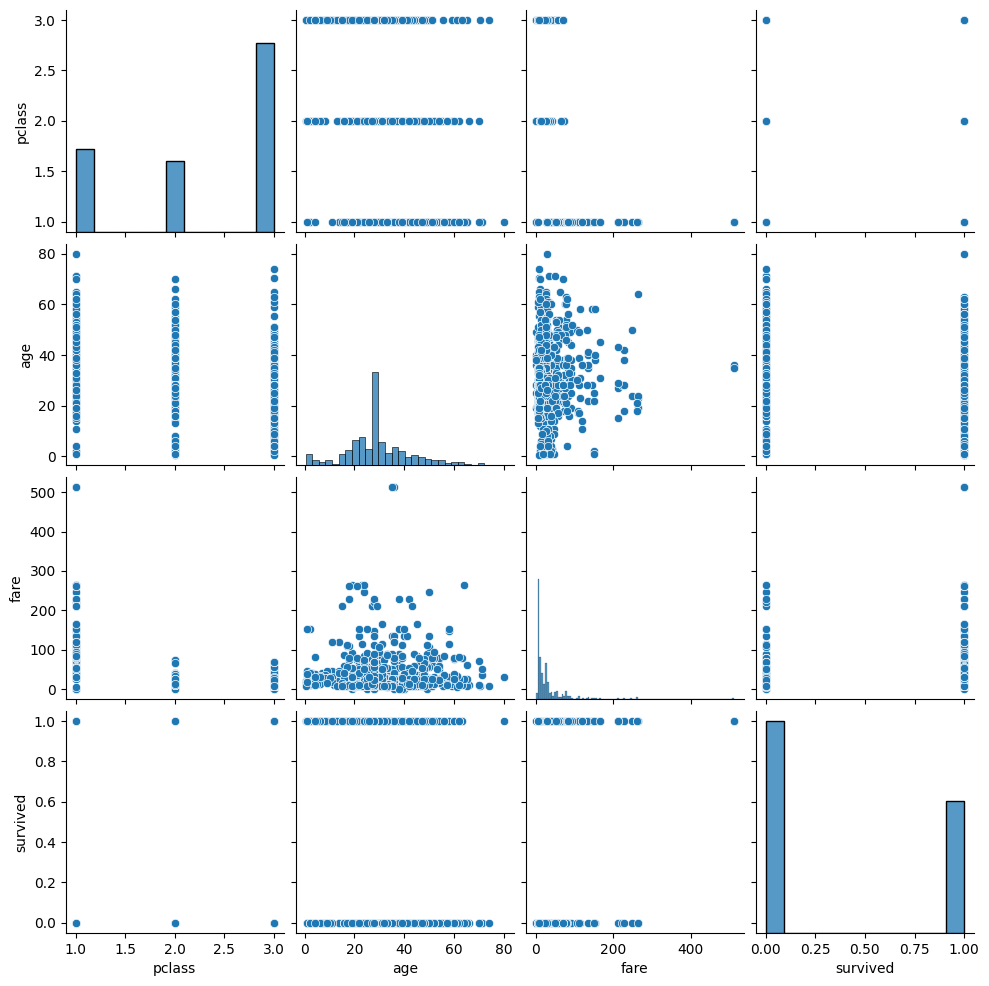

In [73]:
import seaborn as sns
sns.pairplot(df)

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation
`

In [74]:
df.head()

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [76]:
### fillnan
df['age']=df['age'].fillna(df['age'].median())

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\2516624769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].fillna(df['age'].median())


In [78]:
df

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [77]:
import matplotlib.pyplot as plt

In [79]:
import scipy.stats as stat
import pylab 

In [80]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

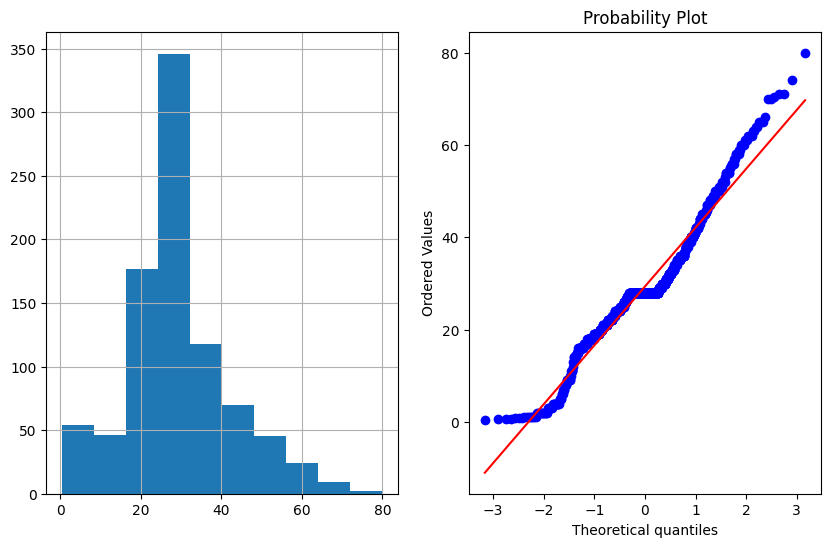

In [81]:
plot_data(df,'age')

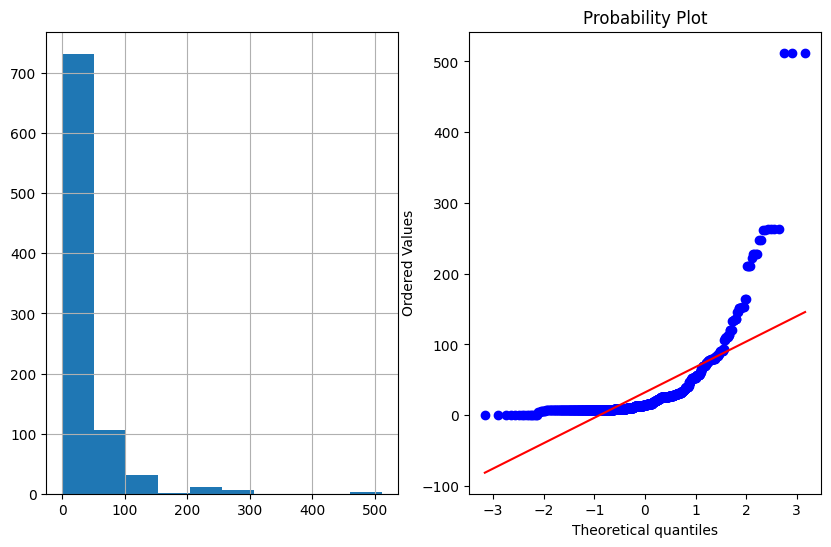

In [82]:
plot_data(df,'fare')

### logTransformation

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\2294559830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_log']=np.log(df['age'])


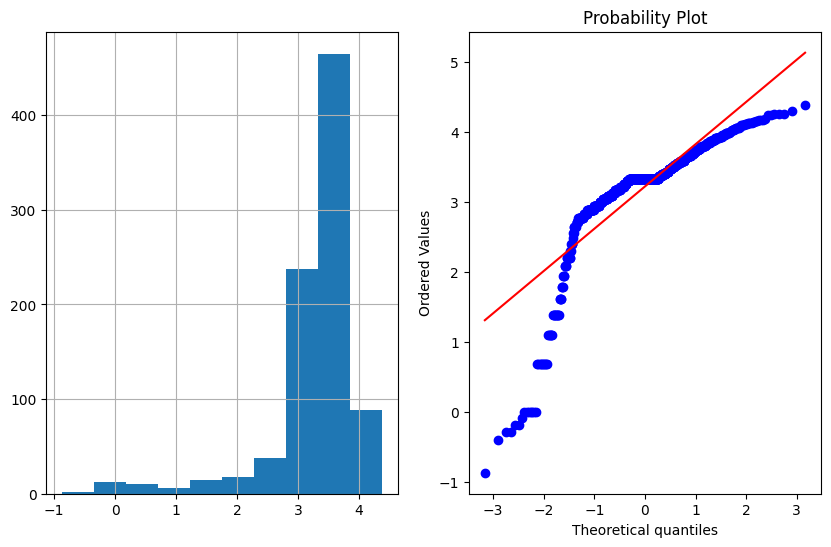

In [84]:
import numpy as np
df['Age_log']=np.log(df['age'])
plot_data(df,'Age_log')

## reciprocal Transforamtion

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\2240047836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_reciprocal']=1/df.age


     pclass   age     fare  survived   Age_log  Age_reciprocal
0         3  22.0   7.2500         0  3.091042        0.045455
1         1  38.0  71.2833         1  3.637586        0.026316
2         3  26.0   7.9250         1  3.258097        0.038462
3         1  35.0  53.1000         1  3.555348        0.028571
4         3  35.0   8.0500         0  3.555348        0.028571
..      ...   ...      ...       ...       ...             ...
886       2  27.0  13.0000         0  3.295837        0.037037
887       1  19.0  30.0000         1  2.944439        0.052632
888       3  28.0  23.4500         0  3.332205        0.035714
889       1  26.0  30.0000         1  3.258097        0.038462
890       3  32.0   7.7500         0  3.465736        0.031250

[891 rows x 6 columns]


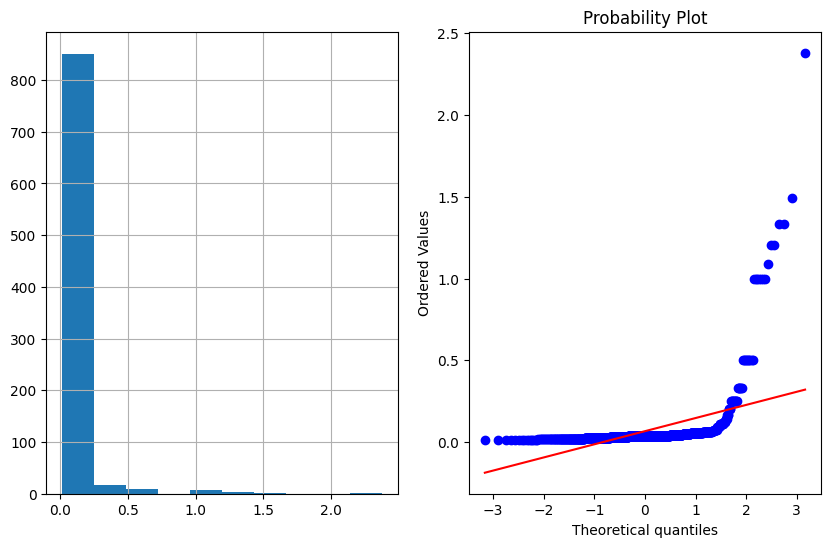

In [88]:
df['Age_reciprocal']=1/df.age
print(df)
plot_data(df,'Age_reciprocal')

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\1274034150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_sqaure']=df.age**(1/2)


     pclass   age     fare  survived   Age_log  Age_reciprocal  Age_sqaure
0         3  22.0   7.2500         0  3.091042        0.045455    4.690416
1         1  38.0  71.2833         1  3.637586        0.026316    6.164414
2         3  26.0   7.9250         1  3.258097        0.038462    5.099020
3         1  35.0  53.1000         1  3.555348        0.028571    5.916080
4         3  35.0   8.0500         0  3.555348        0.028571    5.916080
..      ...   ...      ...       ...       ...             ...         ...
886       2  27.0  13.0000         0  3.295837        0.037037    5.196152
887       1  19.0  30.0000         1  2.944439        0.052632    4.358899
888       3  28.0  23.4500         0  3.332205        0.035714    5.291503
889       1  26.0  30.0000         1  3.258097        0.038462    5.099020
890       3  32.0   7.7500         0  3.465736        0.031250    5.656854

[891 rows x 7 columns]


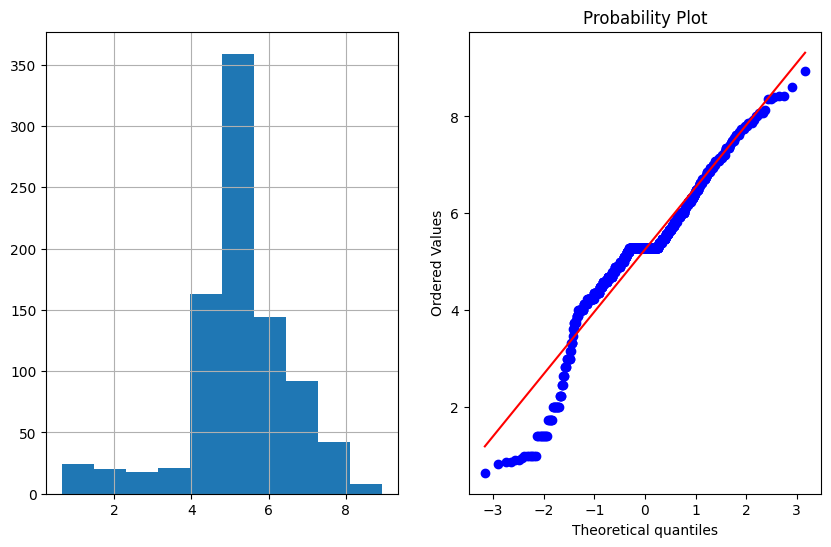

In [90]:
##### Square Root Transformation
df['Age_sqaure']=df.age**(1/2)
print(df)
plot_data(df,'Age_sqaure')

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\1892663454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_exponential']=df.age**(1/1.2)


     pclass   age     fare  survived   Age_log  Age_reciprocal  Age_sqaure  \
0         3  22.0   7.2500         0  3.091042        0.045455    4.690416   
1         1  38.0  71.2833         1  3.637586        0.026316    6.164414   
2         3  26.0   7.9250         1  3.258097        0.038462    5.099020   
3         1  35.0  53.1000         1  3.555348        0.028571    5.916080   
4         3  35.0   8.0500         0  3.555348        0.028571    5.916080   
..      ...   ...      ...       ...       ...             ...         ...   
886       2  27.0  13.0000         0  3.295837        0.037037    5.196152   
887       1  19.0  30.0000         1  2.944439        0.052632    4.358899   
888       3  28.0  23.4500         0  3.332205        0.035714    5.291503   
889       1  26.0  30.0000         1  3.258097        0.038462    5.099020   
890       3  32.0   7.7500         0  3.465736        0.031250    5.656854   

     Age_exponential  
0          13.142729  
1          20.724

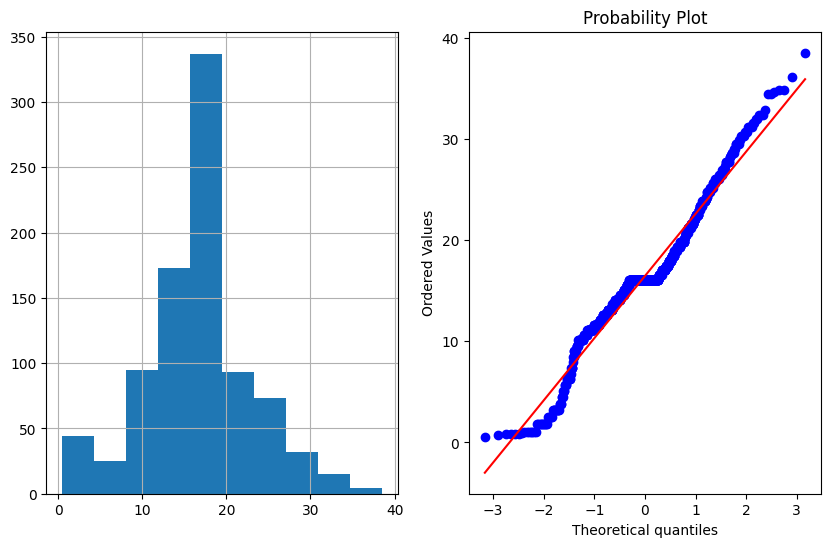

In [93]:
#### Exponential Transdormation
df['Age_exponential']=df.age**(1/1.2)
print(df)
plot_data(df,'Age_exponential')

### Box-cox

In [94]:
df['Age_Boxcox'],parameters=stat.boxcox(df['age'])

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\4125629820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Boxcox'],parameters=stat.boxcox(df['age'])


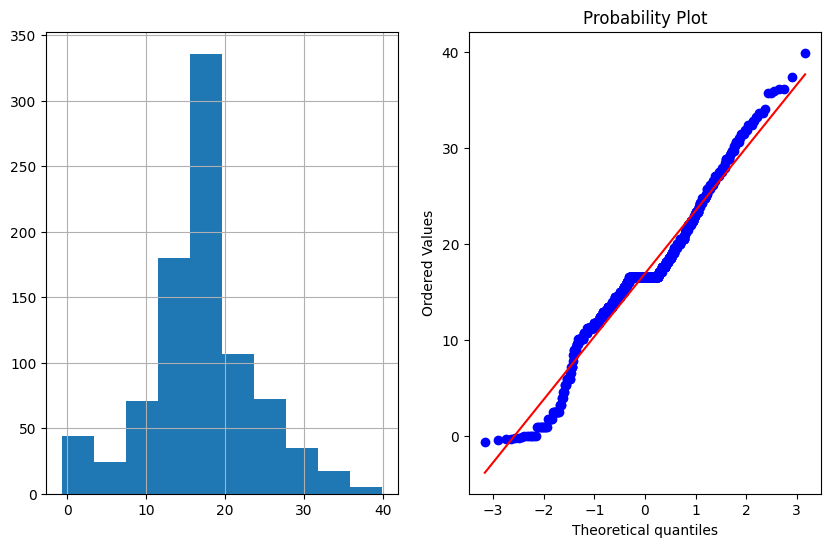

In [95]:
plot_data(df,'Age_Boxcox')

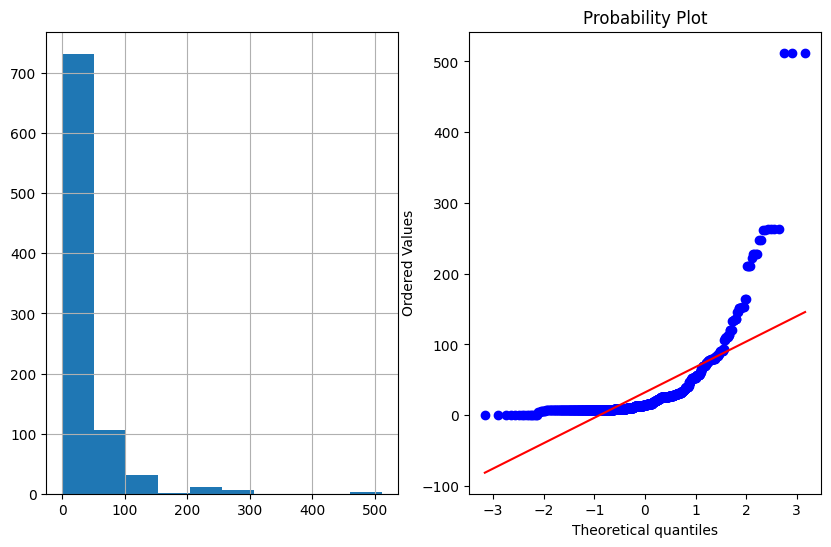

In [97]:
#### Fare
plot_data(df,'fare')

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\738607727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_log']=np.log1p(df['fare'])


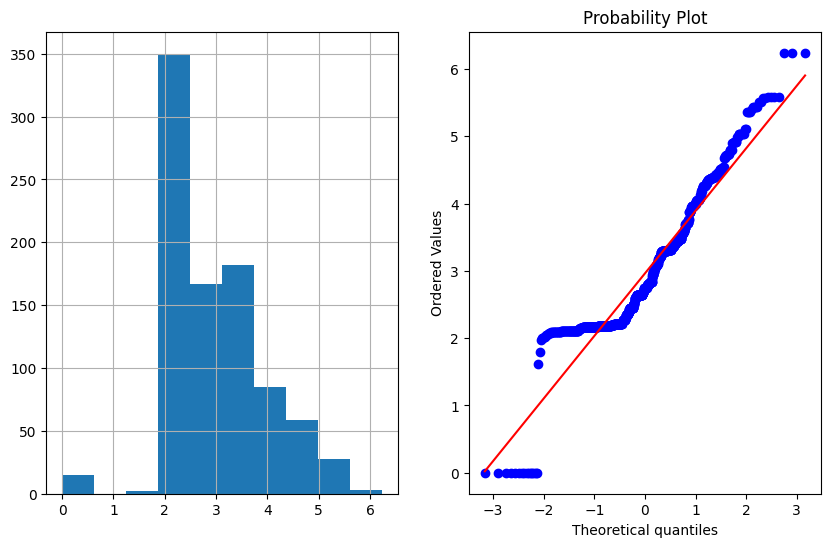

In [99]:
#### Fare
df['Fare_log']=np.log1p(df['fare'])
plot_data(df,'Fare_log')

C:\Users\tumat\AppData\Local\Temp\ipykernel_14264\1247207562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)


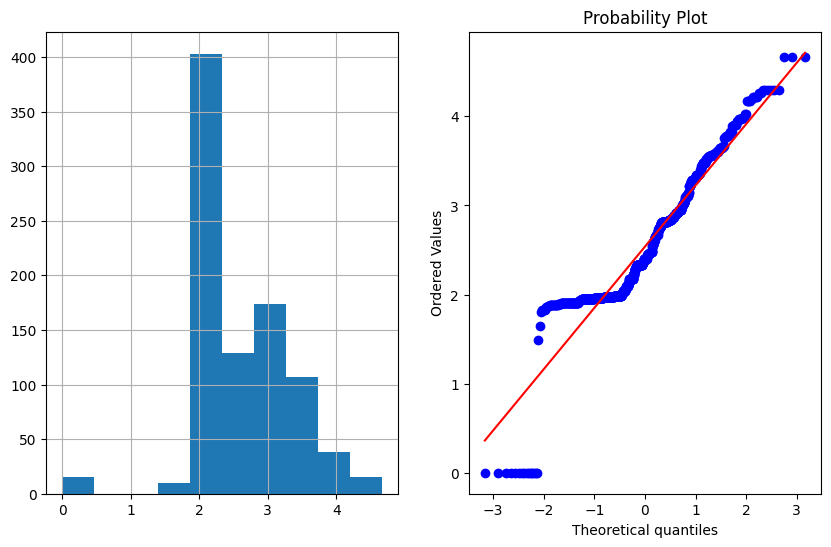

In [96]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)
plot_data(df,'Fare_Boxcox')